# IIT Ai


In [76]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
import streamlit as st
import os




In [77]:
#taking the path of the images
count = 0
dirs=os.listdir('D:\IIT AI\iit_pdu_ai\projects\PNEUMONIA\chest_xray/train')
for dir in dirs:
    files = list(os.listdir('D:\IIT AI\iit_pdu_ai\projects\PNEUMONIA\chest_xray/train/'+dir))
    print(dir +'file has '+str(len(files))+' images')
    count += len(files)
print('Total number of images in train folder is '+str(count))

NORMALfile has 4023 images
PNEUMONIAfile has 11625 images
Total number of images in train folder is 15648


In [78]:
# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\IIT AI\iit_pdu_ai\projects\PNEUMONIA\chest_xray/train',
    image_size=(150, 150),
    batch_size=32,
    color_mode='grayscale'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\IIT AI\iit_pdu_ai\projects\PNEUMONIA\chest_xray/val',
    image_size=(150, 150),
    batch_size=32,
    color_mode='grayscale'
)

Found 15648 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [79]:
class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

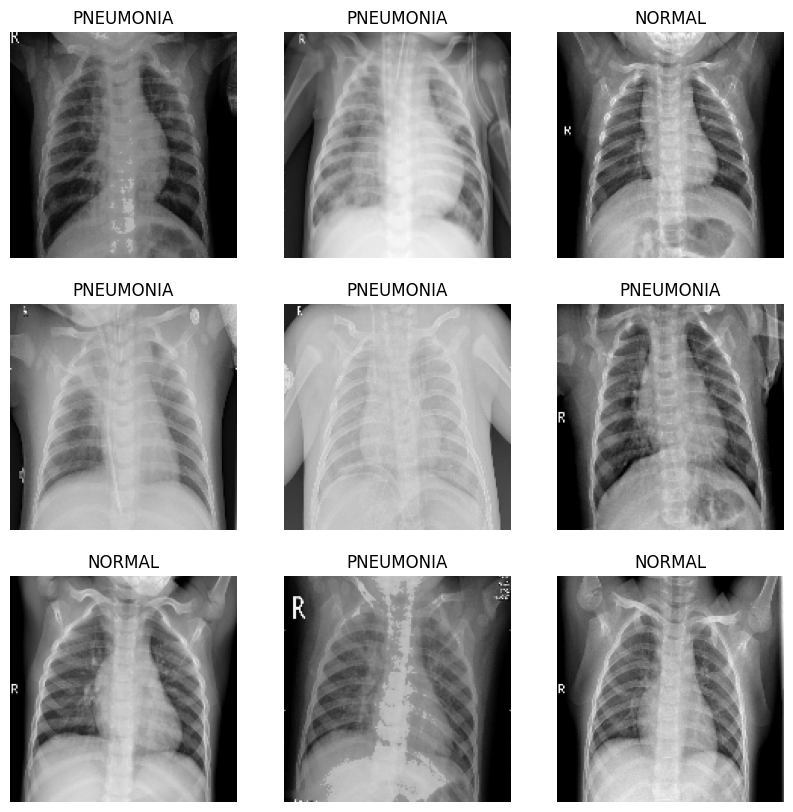

In [80]:
i=0
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"), cmap='gray')
        plt.title(class_names[labels[j]])
        plt.axis("off")

In [81]:
autotune = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=autotune)
val_ds = val_ds.cache().prefetch(buffer_size=autotune)

In [82]:
data_augmentation = tf.keras.Sequential([
    #layers.RandomFlip("horizontal", input_shape= (10, 10 , 1)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
])

Shape before passing to model: (150, 150, 1)


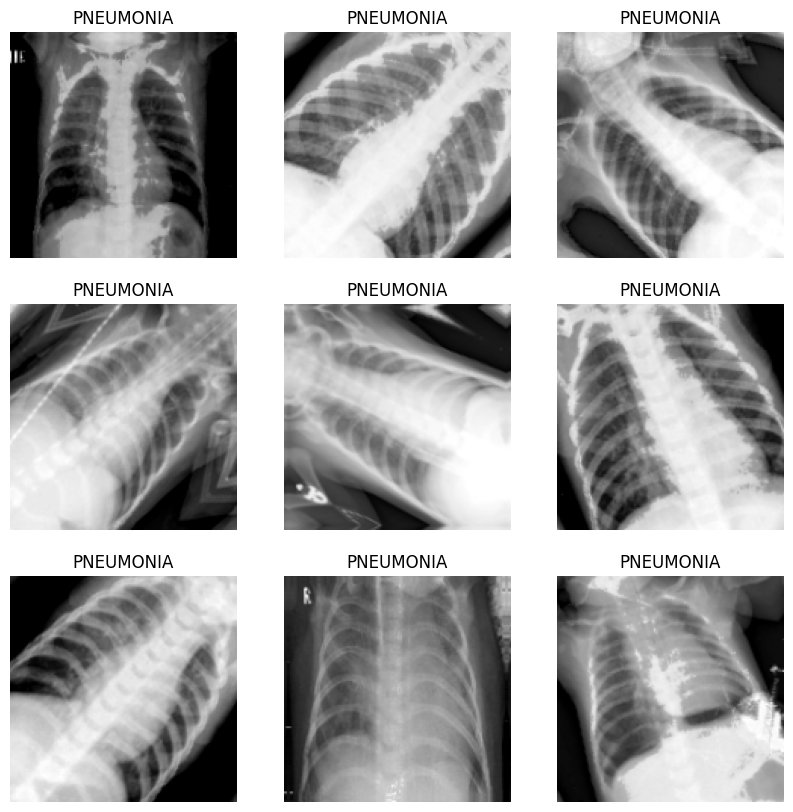

In [83]:
k=0
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        augmented_image = data_augmentation(images[j])
        plt.imshow(tf.squeeze(augmented_image).numpy().astype("uint8"), cmap='gray')
        plt.title(class_names[labels[j]])
        plt.axis("off")
print("Shape before passing to model:", augmented_image.shape)


In [84]:
import os
import tensorflow as tf

# 1) Point to the inner chest_xray folder
base_dir  = "projects/PNEUMONIA/chest_xray/chest_xray"   # ← adjust if your cwd is different
train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "val")

# 2) Quick sanity check
assert os.path.isdir(train_dir), f"Train dir not found: {train_dir}"
assert os.path.isdir(val_dir),   f"Val   dir not found: {val_dir}"
print("✅ Data directories exist.")

# 3) Load as grayscale + binary labels
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150,150),
    batch_size=32,
    color_mode="grayscale",
    label_mode="binary",
).map(lambda x, y: (x, tf.squeeze(y, axis=-1)))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(150,150),
    batch_size=32,
    color_mode="grayscale",
    label_mode="binary",
).map(lambda x, y: (x, tf.squeeze(y, axis=-1)))

# Optional performance tweaks
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# 4) Model (unchanged)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(150,150,1)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

# 5) Fit
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


✅ Data directories exist.
Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 663ms/step - accuracy: 0.8335 - loss: 0.3735 - val_accuracy: 0.6875 - val_loss: 0.6219
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 592ms/step - accuracy: 0.9658 - loss: 0.0934 - val_accuracy: 0.6875 - val_loss: 0.5716
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 589ms/step - accuracy: 0.9706 - loss: 0.0836 - val_accuracy: 0.6875 - val_loss: 0.5335
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 592ms/step - accuracy: 0.9795 - loss: 0.0578 - val_accuracy: 0.6875 - val_loss: 0.5134
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 605ms/step - accuracy: 0.9818 - loss: 0.0452 - val_accuracy: 0.6875 - val_loss: 0.7353
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 563ms/step - accuracy: 0.9829 - loss: 0.0560 - val_accuracy: 0.8125 - val_loss: 0.3406
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 563ms/step - accuracy: 0.9855 - loss: 0.0388 - val_accuracy: 0.

In [196]:
input_image = tf.keras.utils.load_img(
    r'D:\IIT AI\iit_pdu_ai\projects\PNEUMONIA\chest_xray\test\NORMAL\NORMAL2-IM-0033-0001.jpeg',
    color_mode='grayscale',
    target_size=(150, 150)
)
input_image_array = tf.keras.utils.img_to_array(input_image)
imput_image_array_exp_dim = np.expand_dims(input_image_array, 0)
predictions = model.predict(imput_image_array_exp_dim)
print(predictions[0])
if predictions[0] > 0.5:
    print("Pneumonia")
else:
    print("Normal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[0.00021937]
Normal


In [197]:
model.save('pneumonia_identifing_model.h5')


In [ ]:
print("test")